$predicted  number of fires = indicator(past fires) [a(time) + b(TMAX) + c(PRCP) + d(AWND) + e(Hubdist) + f]$

In [19]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%cd C:\Users\acoel\Documents\MS Stats\Research\Wildfire\data

C:\Users\acoel\Documents\MS Stats\Research\Wildfire\data


In [35]:
df = pd.read_pickle(r'FIRESTAT 2005 with Distance and Weather v2.pkl')
weather_df = pd.read_pickle(r'California Weather Data\CA Daily Merged.pkl')

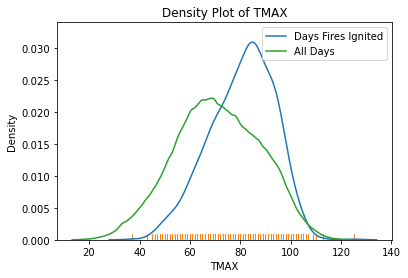

In [53]:
# temperature and number of fires ignited
col = 'TMAX'
sns.kdeplot(x = df[col], label = 'Days Fires Ignited')
sns.rugplot(x = df[col])
sub_weather = weather_df[~weather_df[col].isna()]
sns.kdeplot(x = sub_weather[(np.abs(stats.zscore(sub_weather[col])) < 3)][col], label = 'All Days')

plt.title(f'Density Plot of {col}')
plt.legend(loc = 'upper right')
plt.show()

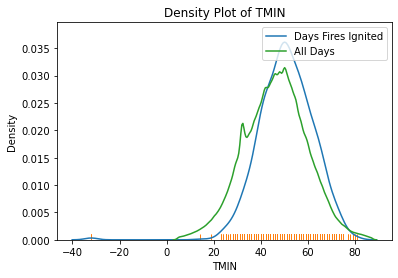

In [65]:
# temperature and number of fires ignited
col = 'TMIN'
sns.kdeplot(x = df[col], label = 'Days Fires Ignited')
sns.rugplot(x = df[col])
sub_weather = weather_df[~weather_df[col].isna()]
sns.kdeplot(x = sub_weather[(np.abs(stats.zscore(sub_weather[col])) < 3)][col], label = 'All Days')

plt.title(f'Density Plot of {col}')
plt.legend(loc = 'upper right')
plt.show()

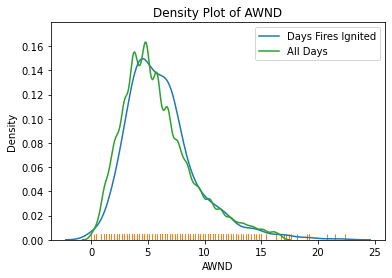

In [50]:
# temperature and number of fires ignited
col = 'AWND'
sns.kdeplot(x = df[col], label = 'Days Fires Ignited')
sns.rugplot(x = df[col])
sub_weather = weather_df[~weather_df[col].isna()]
sns.kdeplot(x = sub_weather[(np.abs(stats.zscore(sub_weather[col])) < 3)][col], label = 'All Days')

plt.title(f'Density Plot of {col}')
plt.legend(loc = 'upper right')
plt.show()

<AxesSubplot:ylabel='Density'>

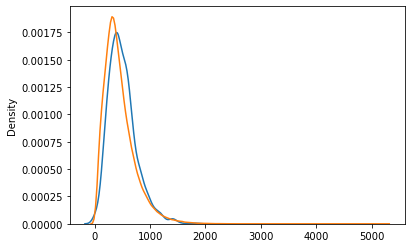

In [45]:
sns.kdeplot(x = abs(df['AWND']*df['TMAX']))
sns.kdeplot(x = abs(weather_df['AWND']*weather_df['TMAX']))
# sns.rugplot(x = abs(df[col]))
# sub_weather = weather_df[~weather_df[col].isna()]
# sns.kdeplot(x = sub_weather[(np.abs(stats.zscore(sub_weather[col])) < 3)][col])

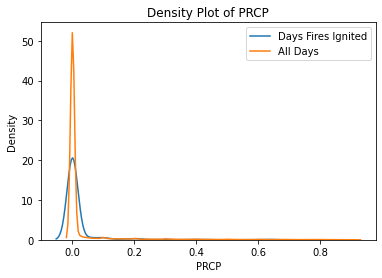

In [56]:
# temperature and number of fires ignited
col = 'PRCP'
sub = df[~df[col].isna()]
sns.kdeplot(x = sub[(np.abs(stats.zscore(sub[col])) < 3)][col], label = 'Days Fires Ignited')
sub_weather = weather_df[~weather_df[col].isna()]
sns.kdeplot(x = sub_weather[(np.abs(stats.zscore(sub_weather[col])) < 3)][col], label = 'All Days')

plt.title(f'Density Plot of {col}')
plt.legend()
plt.show()

In [69]:
df[['TMAX', 'TMIN', 'AWND', 'PRCP']].corr()

,TMAX,TMIN,AWND,PRCP
TMAX,1.000000,0.600885,-0.088853,-0.225556
TMIN,0.600885,1.000000,0.054609,-0.092585
AWND,-0.088853,0.054609,1.000000,-0.012260
PRCP,-0.225556,-0.092585,-0.012260,1.000000


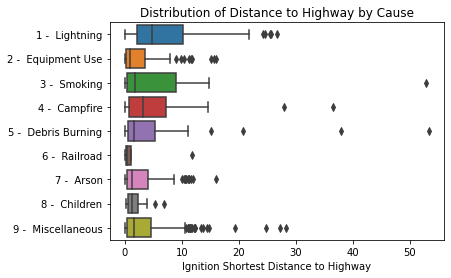

In [64]:
sns.boxplot(data = df.sort_values('STATISTICAL_CAUSE'), x = 'HubDist', y = 'STATISTICAL_CAUSE')
plt.xlabel('Ignition Shortest Distance to Highway')
plt.ylabel('')
plt.title('Distribution of Distance to Highway by Cause')
plt.show()